# Author: 

# Simple Linear Regression

**In this regression task to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading The Data From URL

**Dataset can taken from http://bit.ly/w-data**

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
data # Displaying All data from the link csv

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe() # Checking statistics of dataset 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.corr() # correaltion 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


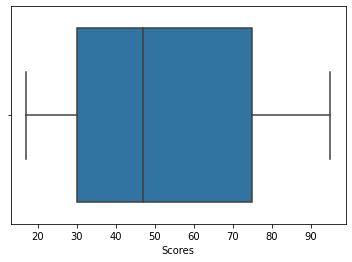

In [9]:
sns.boxplot(x='Scores',data=data) # Boxplot to find outliers in dataset of Scores

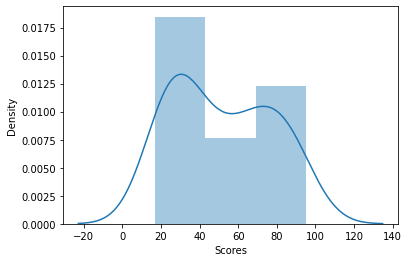

In [10]:
sns.distplot(data["Scores"])

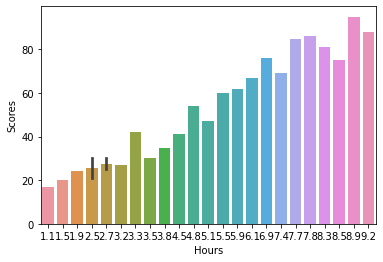

In [11]:
sns.barplot(data['Hours'],data['Scores'])

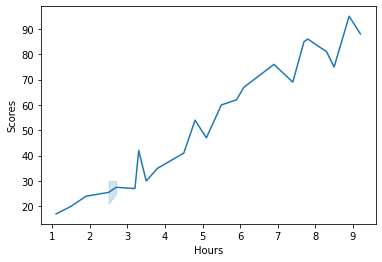

In [12]:
sns.lineplot(data['Hours'],data['Scores'])

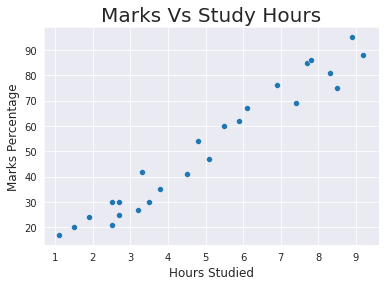

In [13]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

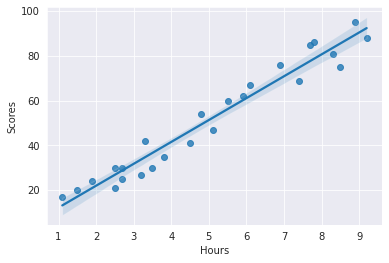

In [14]:
sns.regplot(x=data['Hours'],y=data['Scores'])

In [15]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**It Show that the variables are positively correlated.**

# Model Training

**Splitting the Data into Train and Test i.e X and Y**

**#Preparing the data**

In [16]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [18]:
#We have split our data into training and testing sets, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Making Predictions

In [19]:
#Now that we have trained our algorithm, it's time to make some predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Predicting the Percentage of Marks

In [20]:
pred_y = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


# Comparing the Predicted Marks with the Actual Marks

In [21]:
compare = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
#What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?
hours = [9.25]
answer = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Score = {}".format(round(answer[0],3)))

No of Hours = [9.25]
Score = 93.692


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**

# Visually Comparing the Predicted Marks with the Actual Marks

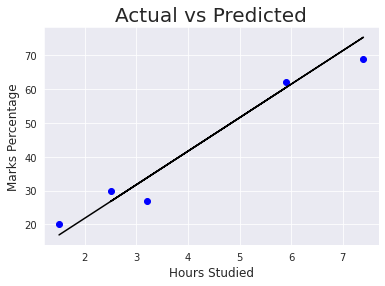

In [23]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the model

**The final step is to evaluate the performance of algorithm.**

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# Conclusion:-
 **I was Successfully carry out the prediction using Supervised ML task and calculated the marks based on hours 
 If Student Study for 9.25 Hours Then the student will get 93.692 Marks in exam according to Simple Linear Regression model.**